I am very interested in calculating and analyzing Quinn Priester's whiff rates since he joined the Red Sox organization.

Using baseballsavant, I copy and pasted each of Priester's Woo Sox pitch-by-pitch game logs onto a google spreadsheet. A few of the data columns I entered manually by looking up the batters on baseball reference, such as the bats_l/r column. Once I had all of the data I wanted, I saved and downloaded the file as a .csv in order to make it compatible with jupyter, python, and pandas. 
# 

In [1]:
import pandas as pd
df=pd.read_csv('priester.csv')
df

,pitching_appearance,pitcher,batter,bats_l/r,total_pitch_count,ab_pitch_count,plate_appearance,inning,pitch_result,count,pitch_type,exit_velo,pitch_velo,spin_rate,v_break,h_break
0,1,Quinn Priester,Alan Roden,L,1,1,1,1,Ball,0-0,4-Seam Fastball,NaN,92.2,2163,20,3
1,1,Quinn Priester,Alan Roden,L,2,2,1,1,Called Strike,1-0,Sinker,NaN,92.1,1912,27,15
2,1,Quinn Priester,Alan Roden,L,3,3,1,1,Called Strike,1-1,Changeup,NaN,87.7,1338,33,17
3,1,Quinn Priester,Alan Roden,L,4,4,1,1,Ball,1-2,Changeup,NaN,88.3,1326,33,14
4,1,Quinn Priester,Alan Roden,L,5,5,1,1,"In play, single",2-2,Changeup,108.6,88.7,1449,29,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,8,Quinn Priester,Carlos Cortes,L,531,1,142,4,Ball,0-0,Slider,NaN,86.9,2479,33,2
531,8,Quinn Priester,Carlos Cortes,L,532,2,142,4,Called Strike,1-0,Sinker,NaN,93.7,1980,27,17
532,8,Quinn Priester,Carlos Cortes,L,533,3,142,4,"In play, home run",1-1,4-Seam Fastball,99,92.3,2254,16,8
533,8,Quinn Priester,Austin Allen,L,534,1,143,4,Swinging Strike,0-0,Curveball,NaN,81.9,2629,46,5


# 
We can see in the dataframe above, which I called df, that Priester has thrown 535 total pitches in 8 appearances with the Woo Sox (as of September 16th, 2024). 

For this specific project, I want to compare Priester's whiff rates against lefty hitters vs his whiff rates against righty hitters, for each pitch type.

First, I will create a new dataframe called new_df which contains the necessary columns for this exercise: bats_l/r, pitch_result, and pitch_type.
# 

In [2]:
new_df=df[['bats_l/r', 'pitch_result', 'pitch_type']] 
new_df

,bats_l/r,pitch_result,pitch_type
0,L,Ball,4-Seam Fastball
1,L,Called Strike,Sinker
2,L,Called Strike,Changeup
3,L,Ball,Changeup
4,L,"In play, single",Changeup
...,...,...,...
530,L,Ball,Slider
531,L,Called Strike,Sinker
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


# 
Now, I will split new_df into two new dataframes: TOTAL pitches thrown to lefties, and TOTAL pitches thrown to righties. I will call these two new dataframes lefty_total and righty_total.
# 

In [3]:
lefty_total=new_df.loc[(new_df['bats_l/r']==('L'))]
righty_total=new_df.loc[(new_df['bats_l/r']==('R'))]    

# 
Now, I am able to extract the total amount of pitches thrown for each pitch type against lefties and each pitch type against righties:
# 

In [4]:
lefty_sinker_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Sinker'))])
lefty_changeup_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Changeup'))])
lefty_4seam_total=len(lefty_total.loc[(lefty_total['pitch_type']==('4-Seam Fastball'))])
lefty_slider_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Slider'))])
lefty_curveball_total=len(lefty_total.loc[(lefty_total['pitch_type']==('Curveball'))])

righty_sinker_total=len(righty_total.loc[(righty_total['pitch_type']==('Sinker'))])
righty_changeup_total=len(righty_total.loc[(righty_total['pitch_type']==('Changeup'))])
righty_4seam_total=len(righty_total.loc[(righty_total['pitch_type']==('4-Seam Fastball'))])
righty_slider_total=len(righty_total.loc[(righty_total['pitch_type']==('Slider'))])
righty_curveball_total=len(righty_total.loc[(righty_total['pitch_type']==('Curveball'))])

# 
Next, I want to extract every pitch Priester has thrown with the Woo Sox that was swung at by the batter. Thus, we want to include all rows that include swinging strikes, foul balls, or balls hit in play. I will call this dataframe new_df_2.
# 

In [5]:
new_df_2=new_df.loc[(new_df['pitch_result'].str.contains('In play') | 
            (new_df['pitch_result'].str.contains('Foul') | 
            (new_df['pitch_result'].str.contains('Swinging'))))]
new_df_2

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
22,L,"In play, double",Curveball
...,...,...,...
526,R,Foul,Slider
527,R,Foul,4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


#
Next, there are two results in this dataset that we do not want for the sake of this exercise: foul bunt and catchers interference.
# 

In [6]:
new_df_3=new_df_2.loc[(new_df_2['pitch_result'].str.contains('Bunt') == False)]
new_df_4=new_df_3.loc[(new_df_3['pitch_result'].str.contains('interference') == False)]  
new_df_4

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
22,L,"In play, double",Curveball
...,...,...,...
526,R,Foul,Slider
527,R,Foul,4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


# 
To summarize our progress, we see that Quinn Priester has thrown 254 pitches for the Worcester Red Sox this season that were swung at by the batter. Since Priester has joined the Red Sox organization, hitters are swinging at 47.7% of the pitches he's thrown.
# 

In [7]:
254/535

0.4747663551401869

# 
Next, we will further break dataframe new_df_4 down into two separate dataframes: swings by lefty hitters and swings by righty hitters. I will call these dataframes lefty and righty:
# 

In [8]:
lefty=new_df_4.loc[(new_df_4['bats_l/r']==('L'))]
righty=new_df_4.loc[(new_df_4['bats_l/r']==('R'))]        

In [9]:
lefty

,bats_l/r,pitch_result,pitch_type
4,L,"In play, single",Changeup
22,L,"In play, double",Curveball
26,L,"In play, single",4-Seam Fastball
34,L,"In play, flyout",Curveball
43,L,Swinging Strike,Slider
...,...,...,...
521,L,Swinging Strike,Slider
522,L,"In play, flyout",4-Seam Fastball
532,L,"In play, home run",4-Seam Fastball
533,L,Swinging Strike,Curveball


In [10]:
righty

,bats_l/r,pitch_result,pitch_type
17,R,Swinging Strike,Slider
20,R,Foul,Sinker
21,R,Swinging Strike,Slider
24,R,Swinging Strike,Changeup
25,R,Swinging Strike,4-Seam Fastball
...,...,...,...
505,R,Swinging Strike,Sinker
508,R,"In play, groundout",Changeup
524,R,Foul,4-Seam Fastball
526,R,Foul,Slider


# 
Now, I can further filter the lefty and righty swings by pitch type.
# 

In [11]:
lefty_sinker=lefty.loc[(lefty['pitch_type']==('Sinker'))]
lefty_changeup=lefty.loc[(lefty['pitch_type']==('Changeup'))]
lefty_4seam=lefty.loc[(lefty['pitch_type']==('4-Seam Fastball'))]
lefty_slider=lefty.loc[(lefty['pitch_type']==('Slider'))]
lefty_curveball=lefty.loc[(lefty['pitch_type']==('Curveball'))]

righty_sinker=righty.loc[(righty['pitch_type']==('Sinker'))]
righty_changeup=righty.loc[(righty['pitch_type']==('Changeup'))]
righty_4seam=righty.loc[(righty['pitch_type']==('4-Seam Fastball'))]
righty_slider=righty.loc[(righty['pitch_type']==('Slider'))]
righty_curveball=righty.loc[(righty['pitch_type']==('Curveball'))]

# 
We now have dataframes of lefty swings by pitch type and righty swings by pitch type.
As an example, if I print the righty_curveball dataframe, we see righties have swung at Priester's curveball 5 times during his time with the Woo Sox.
# 

In [12]:
righty_curveball

,bats_l/r,pitch_result,pitch_type
110,R,"In play, groundout",Curveball
177,R,Swinging Strike,Curveball
203,R,"In play, popout",Curveball
316,R,Swinging Strike,Curveball
317,R,Swinging Strike,Curveball


# 
Now, the calculation for whiff rate is to divide the number of swinging strikes/number of total swings. I will perform this calculation for each paramter(sinker vs lefties, sinker vs righties, changeup vs lefties, etc.)
I will also print the total pitch counts here for each parameter, by calculating the length of each dataframe:
# 

In [13]:
print('Sinker whiff rate vs lefties: ')
print((len(lefty_sinker.loc[(lefty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(lefty_sinker)))
print('Swings:')
print(len(lefty_sinker))
print('')
print('Sinker whiff rate vs righties: ')
print((len(righty_sinker.loc[(righty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(righty_sinker)))
print('Swings:')
print(len(righty_sinker))
print('')
print('Changeup whiff rate vs lefties: ')
print((len(lefty_changeup.loc[(lefty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(lefty_changeup)))
print('Swings:')
print(len(lefty_changeup))
print('')
print('Changeup whiff rate vs righties: ')
print((len(righty_changeup.loc[(righty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(righty_changeup)))
print('Swings:')
print(len(righty_changeup))
print('')
print(' 4-Seam Fastball whiff rate vs lefties: ')
print((len(lefty_4seam.loc[(lefty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(lefty_4seam)))
print('Swings:')
print(len(lefty_4seam))
print('')
print('4-Seam Fastball whiff rate vs righties: ')
print((len(righty_4seam.loc[(righty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(righty_4seam)))
print('Swings:')
print(len(righty_4seam))
print('')
print('Slider whiff rate vs lefties: ')
print((len(lefty_slider.loc[(lefty_slider['pitch_result']==('Swinging Strike'))].index))/(len(lefty_slider)))
print('Swings:')
print(len(lefty_slider))
print('')
print('Slider whiff rate vs righties: ')
print((len(righty_slider.loc[(righty_slider['pitch_result']==('Swinging Strike'))].index))/(len(righty_slider)))
print('Swings:')
print(len(righty_slider))
print('')
print('Curveball whiff rate vs lefties: ')
print((len(lefty_curveball.loc[(lefty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(lefty_curveball)))
print('Swings:')
print(len(lefty_curveball))
print('')
print('Curveball whiff rate vs righties: ')
print((len(righty_curveball.loc[(righty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(righty_curveball)))
print('Swings:')
print(len(righty_curveball))
print('')


Sinker whiff rate vs lefties: 
0.06451612903225806
Swings:
31

Sinker whiff rate vs righties: 
0.21568627450980393
Swings:
51

Changeup whiff rate vs lefties: 
0.4782608695652174
Swings:
23

Changeup whiff rate vs righties: 
0.3
Swings:
10

 4-Seam Fastball whiff rate vs lefties: 
0.20833333333333334
Swings:
24

4-Seam Fastball whiff rate vs righties: 
0.2222222222222222
Swings:
9

Slider whiff rate vs lefties: 
0.43478260869565216
Swings:
23

Slider whiff rate vs righties: 
0.5
Swings:
64

Curveball whiff rate vs lefties: 
0.2857142857142857
Swings:
14

Curveball whiff rate vs righties: 
0.6
Swings:
5



# 
Next, I will organize the results above into dataframes for better visability:
#                                                                                                     

In [14]:
lefty_whiff_rates={'Sinker vs Lefties':['6.5%'],'Changeup vs Lefties':['47.8%'],'4-Seam Fastball vs Lefties':['20.8%'],
                   'Slider vs Lefties':['43.5%'],'Curveball vs Lefties':['28.6%']}
lefty_whiff_rates=pd.DataFrame(lefty_whiff_rates)
righty_whiff_rates={'Sinker vs Righties':['21.6%'],'Changeup vs Righties':['30%'],'4-Seam Fastball vs Righties':['22.2%'],
                    'Slider vs Righties':['50%'],'Curveball vs Righties':['60%']}
righty_whiff_rates=pd.DataFrame(righty_whiff_rates)
whiff_rates={'Sinker vs Lefties':['6.5%'],'Sinker vs Righties':['21.6%'],'Changeup vs Lefties':['47.8%'],'Changeup vs Righties':['30%'],
             '4-Seam Fastball vs Lefties':['20.8%'],'4-Seam Fastball vs Righties':['22.2%'],'Slider vs Lefties':['43.5%'],'Slider vs Righties':['50%'],
                 'Curveball vs Lefties':['28.6%'],'Curveball vs Righties':['60%']}
whiff_rates=pd.DataFrame(whiff_rates)


In [15]:
lefty_whiff_rates

,Sinker vs Lefties,Changeup vs Lefties,4-Seam Fastball vs Lefties,Slider vs Lefties,Curveball vs Lefties
0,6.5%,47.8%,20.8%,43.5%,28.6%


In [16]:
righty_whiff_rates

,Sinker vs Righties,Changeup vs Righties,4-Seam Fastball vs Righties,Slider vs Righties,Curveball vs Righties
0,21.6%,30%,22.2%,50%,60%


In [17]:
whiff_rates

,Sinker vs Lefties,Sinker vs Righties,Changeup vs Lefties,Changeup vs Righties,4-Seam Fastball vs Lefties,4-Seam Fastball vs Righties,Slider vs Lefties,Slider vs Righties,Curveball vs Lefties,Curveball vs Righties
0,6.5%,21.6%,47.8%,30%,20.8%,22.2%,43.5%,50%,28.6%,60%


# 
By these results, we see that Priester's best whiff rate during his time with the Woo Sox has been throwing his curveball to righties. Righty hitters have whiffed at his curveball 60% of the time they swing at it. However, this is a small sample size, as righty hitters have only swung at his curveball 5 times. 

A very encouraging result here for Priester is his Slider against righties. During his time with Worcester, righties have swung at his slider 64 times and whiffed on 50% of those swings. That is incredible!

I am now going to add in code to include the total pitches thrown for each parameter. We can find the total pitches thrown by extracting from the _total dataframes I created earlier in the exercise.
# 

In [18]:
print('Sinker whiff rate vs lefties: ')
print((len(lefty_sinker.loc[(lefty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(lefty_sinker)))
print('Swings:')
print(len(lefty_sinker))
print('Pitches: ')
print(lefty_sinker_total)
print('')
print('Sinker whiff rate vs righties: ')
print((len(righty_sinker.loc[(righty_sinker['pitch_result']==('Swinging Strike'))].index))/(len(righty_sinker)))
print('Swings:')
print(len(righty_sinker))
print('Pitches: ')
print(righty_sinker_total)
print('')
print('Changeup whiff rate vs lefties: ')
print((len(lefty_changeup.loc[(lefty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(lefty_changeup)))
print('Swings:')
print(len(lefty_changeup))
print('Pitches: ')
print(lefty_changeup_total)
print('')
print('Changeup whiff rate vs righties: ')
print((len(righty_changeup.loc[(righty_changeup['pitch_result']==('Swinging Strike'))].index))/(len(righty_changeup)))
print('Swings:')
print(len(righty_changeup))
print('Pitches: ')
print(righty_changeup_total)
print('')
print('4-Seam Fastball whiff rate vs lefties: ')
print((len(lefty_4seam.loc[(lefty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(lefty_4seam)))
print('Swings:')
print(len(lefty_4seam))
print('Pitches: ')
print(lefty_4seam_total)
print('')
print('4-Seam Fastball whiff rate vs righties: ')
print((len(righty_4seam.loc[(righty_4seam['pitch_result']==('Swinging Strike'))].index))/(len(righty_4seam)))
print('Swings:')
print(len(righty_4seam))
print('Pitches: ')
print(righty_4seam_total)
print('')
print('Slider whiff rate vs lefties: ')
print((len(lefty_slider.loc[(lefty_slider['pitch_result']==('Swinging Strike'))].index))/(len(lefty_slider)))
print('Swings:')
print(len(lefty_slider))
print('Pitches: ')
print(lefty_slider_total)
print('')
print('Slider whiff rate vs righties: ')
print((len(righty_slider.loc[(righty_slider['pitch_result']==('Swinging Strike'))].index))/(len(righty_slider)))
print('Swings:')
print(len(righty_slider))
print('Pitches: ')
print(righty_slider_total)
print('')
print('Curveball whiff rate vs lefties: ')
print((len(lefty_curveball.loc[(lefty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(lefty_curveball)))
print('Swings:')
print(len(lefty_curveball))
print('Pitches: ')
print(lefty_curveball_total)
print('')
print('Curveball whiff rate vs righties: ')
print((len(righty_curveball.loc[(righty_curveball['pitch_result']==('Swinging Strike'))].index))/(len(righty_curveball)))
print('Swings:')
print(len(righty_curveball))
print('Pitches: ')
print(righty_curveball_total)
print('')


Sinker whiff rate vs lefties: 
0.06451612903225806
Swings:
31
Pitches: 
79

Sinker whiff rate vs righties: 
0.21568627450980393
Swings:
51
Pitches: 
110

Changeup whiff rate vs lefties: 
0.4782608695652174
Swings:
23
Pitches: 
56

Changeup whiff rate vs righties: 
0.3
Swings:
10
Pitches: 
21

4-Seam Fastball whiff rate vs lefties: 
0.20833333333333334
Swings:
24
Pitches: 
48

4-Seam Fastball whiff rate vs righties: 
0.2222222222222222
Swings:
9
Pitches: 
17

Slider whiff rate vs lefties: 
0.43478260869565216
Swings:
23
Pitches: 
39

Slider whiff rate vs righties: 
0.5
Swings:
64
Pitches: 
120

Curveball whiff rate vs lefties: 
0.2857142857142857
Swings:
14
Pitches: 
32

Curveball whiff rate vs righties: 
0.6
Swings:
5
Pitches: 
13



# 
Additionally, going back to the original dataframe df, let's examine how many total pitches Priester has thrown to righties, and how many total pitches he's thrown to lefties:
# 

In [19]:
print('Total pitches vs lefties:')
print((len(df.loc[(df['bats_l/r']==('L'))])))
print('Total pitches vs righties:')
print((len(df.loc[(df['bats_l/r']==('R'))])))


Total pitches vs lefties:
254
Total pitches vs righties:
281


# 
It is clear that, by far, the most common pitches Priester throws against righties are his sinker and slider:
# 

In [20]:
print('Sliders vs righties:')
print(120/281)
print('Sinkers vs righties:')
print(110/281)

Sliders vs righties:
0.42704626334519574
Sinkers vs righties:
0.3914590747330961


#
So, against righties, Priester throws his slider 42.7% of the time, and throws his sinker 39.1% of the time. However, scrolling up to the dataframe visuals, we see a major difference in whiff rate between the two, as righties have a 21.6% whiff rate against his sinker, compared to a 50% whiff rate against his slider. This leads to the question: should Priester be throwing his slider to righties more than he already is? Of course, if the high contact rate for righties against Priester's sinker is leading to a ton of soft groundouts, then it shouldn't be too big a concern. Thus, a separate exercise analyzing Priester's exit velocities will be useful, but these early data results do show signs that at the very least it is worth considering the possibility that maybe Priester should be throwing his slider to righties even more than he already is. 

A concerning result that stounds out from our data is Priester's sinker whiff rate against lefties, which is only at 6.5%. This means when lefties swing at Priester's sinker, they make contact 93.5% of the time. This is a concerningly high number. We see that Priester's slider whiff rate against lefties is 43.5%. If we divide 43.5/6.5, we see that Priester's slider whiff rate against lefties is almost 7 TIMES better than his sinker whiff rate against lefties! Furthermore, interestingly enough, we see that Priester only throws his slider to lefties 15.4% of the time, while he throws his sinker to lefties more than double that, at 31.1%. These results, while a separate analysis exploring exit velocities would be useful, suggest to me that it may be worth looking into potentially exploring Priester throwing more sliders and less sinkers against lefties in the future.

I will now create visuals below for more enhanced visualization. The bar chart shows the whiff rates, while the pie charts show Priester's lefty batter pitch distribution and righty batter pitch distribution.
# 



Note: you may need to restart the kernel to use updated packages.


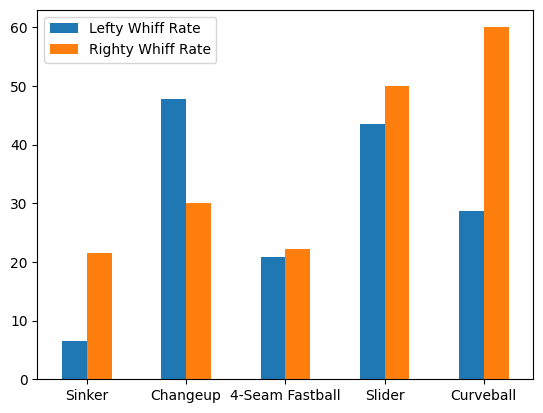

In [21]:
%pip install matplotlib
lefty_whiff_rate=[6.5,47.8,20.8,43.5,28.6]
righty_whiff_rate=[21.6,30,22.2,50,60]
index=['Sinker','Changeup','4-Seam Fastball','Slider','Curveball']
plot_data=pd.DataFrame({'Lefty Whiff Rate':lefty_whiff_rate,'Righty Whiff Rate':righty_whiff_rate},index=index)
ax=plot_data.plot.bar(rot=0)

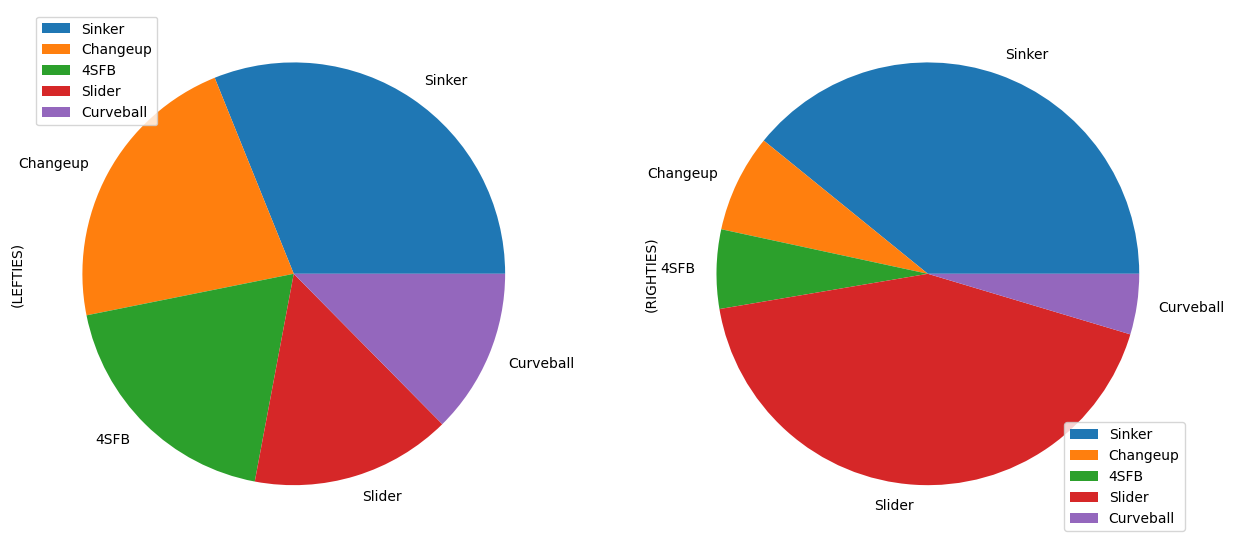

In [22]:
pitch_distribution=pd.DataFrame({'(LEFTIES)':[(lefty_sinker_total),(lefty_changeup_total),(lefty_4seam_total),
                                                                  (lefty_slider_total),(lefty_curveball_total)],
                                 '(RIGHTIES)':[(righty_sinker_total),(righty_changeup_total),(righty_4seam_total),
                                                                   (righty_slider_total),(righty_curveball_total)]},
                                index=['Sinker','Changeup','4SFB','Slider','Curveball'])
plot_pitch_distribution=pitch_distribution.plot.pie(subplots=True,figsize=(15,10))                                
                                

# 
Conclusion:

To my summarize my thoughts from earlier:
    
-Our pie chart visual shows that, during his time with the Woo Sox, Priester has thrown his sinker to lefties about twice                  as much as he's thrown his slider to lefties. However, his slider whiff rate against lefties is considerably (almost 7x) higher           than his sinker whiff rate against lefties. I believe it is more than likely (though not definite) that Priester's overall                performance against lefties would be improved if his slider/sinker pitch distribution percentage to lefties was closer to even,           rather than throwing sinkers twice as much as the slider against lefties.
    
-Against righties, we see from the pie chart that Priester's pitch distribution percentage for sliders and sinkers is closer to even.      Though Priester's sinker against righties generates whiffs at a higher rate than it does against lefties, his slider whiff rate           against righties is still almost 2.5 times higher than his sinker whiff rate against righties. Since Priester's slider is so              effective at generating whiffs vs righties, I'd be curious to see if his performance would be improved if he increased the frequency      he throws sliders to righties from 42.7% up to 44.7%, and decreased the frequency he throws sinkers to righties from 39.1% down to        37.1%.